# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [ ]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2)*(numpy.sin(x));

Ensure your function works with numpy arrays:

In [ ]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return (2*x*numpy.sin(x))-(((x**2)-2)*numpy.cos(x))-2;

Check your solution with the same numpy array:

In [47]:
assert g(0) == 0.

In [ ]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [4]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin);
print(integrate_analytic(xmin=0, xmax=4))

1.0965907296271418


Check your analytic function:

In [ ]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [5]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

def integrate_numeric(xmin, xmax, N):
    s=0
    dx=(xmax-xmin)/N
    for i in range(0, N+1):
        m = ((xmin+(i*dx))+(xmin+((i-1)*dx)))/2
        if i == 0:
            s = s + f(xmin)
        elif i == N:
            s = s + 4*f(m) + f(xmax)
        else:
            s = s + 4*f(m) + 2*f(xmin + (i*dx))
    y=(dx/6)*s
    return y;
                                 
print(integrate_numeric(xmin=0, xmax=4, N=50))

1.096590995599108


Make sure you have implemented Simpson's rule correctly:

In [ ]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [ ]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


<Figure size 432x288 with 0 Axes>

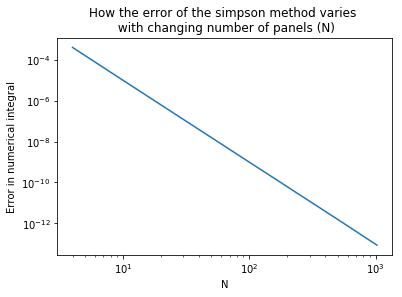

<Figure size 432x288 with 0 Axes>

In [8]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

#Obtain values for error in numerical integral
result_numeric = numpy.zeros(9)
for a in range(0, 9):
    result_numeric[a] = ((integrate_numeric(x0, x1, panel_counts[a]) - result_analytic)**2)**0.5

#make the axis follow a logorithmic scale
plt.xscale('log')
plt.yscale('log')
plt.plot(panel_counts, result_numeric)

#axis labels and title
plt.xlabel("N")
plt.ylabel("Error in numerical integral")
plt.title("How the error of the simpson method varies \n with changing number of panels (N)")
plt.figure()


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels used increases, the accuracy of the integral calculated using the numerical method increases. The error scales at N^-4 which is why a log graph shows a straight line. This is demonstrated by the decreasing nature of the graph as the number of panels used increases. However, at extremely high values of N the error begins to stop following a decreasing pattern. Because of the rounding issues associated with the how the computer stores numbers, the error at very large N stops decreasing and begins to gradually increase in a zig-zag pattern.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The panel count effects the accuracy of the trapezium rule in the same way it effects the accuracy of the simpson rule. Increasing the panel number also increases the accuracy of the trapezium rule, however the increase in the accuracy is at a lower rate for the trapezium rule compared than it is for the Simpson rule. Like wwith simpson, at high numbers of panels the accuracy starts to decrease slightly. 